In [121]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

def visualize_yolo(image_path):

    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    category_model = YOLO('/Users/young/Documents/DL_project/server/category_best.pt')
    category_results = category_model(image_path, verbose=False, conf=0.35)

    box = category_results[0].boxes
    cls = box.cls.tolist()
    boxs = box.xywh.tolist()
    print(boxs)
    print(cls)
    
    for idx, b in enumerate(boxs):
        x, y, w, h = b
        # Convert YOLO coordinates to image coordinates
        # img_height, img_width, _ = img.shape
        # xmin = int((x - w / 2) * img_width)
        # ymin = int((y - h / 2) * img_height)
        # xmax = int((x + w / 2) * img_width)
        # ymax = int((y + h / 2) * img_height)
        xmin = int((x - w / 2))
        ymin = int((y - h / 2))
        xmax = int((x + w / 2))
        ymax = int((y + h / 2))


        # Draw the bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(img, str(cls[idx]), (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

[[261.10858154296875, 318.1143798828125, 466.60699462890625, 552.361328125], [268.3663024902344, 561.0654296875, 297.4639892578125, 237.2242431640625]]
[3.0, 9.0]


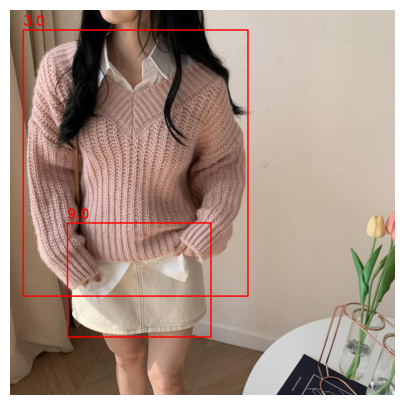

In [123]:
# image_path = '/Users/young/Desktop/img_file/1642.jpg'
# image_path = '/Users/young/Desktop/img_file/1_1.jpeg'
image_path = '/Users/young/Desktop/img_file/899019.jpg'

visualize_yolo(image_path)